# Problem statement

Flight price prediction using scraped data.

# Import Library

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')


In [97]:
df = pd.read_csv("Flight Price Prediction.csv")
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"],axis=1)
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Air Asia,New Delhi,Mumbai,09:25,16:00,6h 35m,1 Stop,"5,953"
1,Air Asia,New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953"
2,Air Asia,New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953"
3,Air Asia,New Delhi,Mumbai,18:35,06:20\n+ 1 day,11h 45m,1 Stop,"5,953"
4,Air Asia,New Delhi,Mumbai,16:15,06:20\n+ 1 day,14h 05m,1 Stop,"5,953"
...,...,...,...,...,...,...,...,...
1601,Go First,Mumbai,Kolkata,16:10,21:55,5h 45m,1 Stop,"25,499"
1602,Go First,Mumbai,Kolkata,08:30,21:55,13h 25m,1 Stop,"26,077"
1603,Air India,Mumbai,Kolkata,12:00,16:00,4h 00m,1 Stop,"26,418"
1604,Vistara,Mumbai,Kolkata,09:05,16:55,7h 50m,2 Stop(s),"27,626"


In [98]:
df.isnull().sum()

Airline         0
Source          0
Destination     0
Dep_Time        0
Arrival_Time    0
Duration        0
Total_Stops     0
Price           0
dtype: int64

In [99]:
df["Price"] = df["Price"].str.replace(r'[^\d.]', '')        
df["Price"] = df["Price"].fillna(0).astype(int)

In [100]:
df.dtypes

Airline         object
Source          object
Destination     object
Dep_Time        object
Arrival_Time    object
Duration        object
Total_Stops     object
Price            int32
dtype: object

In [101]:
df.Price.max()

33570

In [102]:
df.Price.min()

3434

In [103]:
df[df["Price"]==33570]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
430,Vistara,New Delhi,Chennai,06:20,20:25,14h 05m,2 Stop(s),33570


Airline vistara charged high amount of price for ticket. It has 2 stops and it take 14h and 5m for reaching the destination point.

In [104]:
df[df["Price"]==3434]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
934,SpiceJet,New Delhi,Jaipur,05:55,06:55,1h 00m,Non Stop,3434


Low level of price charged airline is spicejet but it doesn't take any connection while going to destination, it is non stop airline. It took 1h for reaching the destination. So compare the above
two insident we can learn that the price of tickets deppends on duration and total stops. so lets learn more about it .

In [105]:
for i in df.columns:
    if df[i].dtype == "object":
        print(df[i].value_counts())
        print()

Air India    424
IndiGo       395
Vistara      372
Go First     159
Air Asia     143
SpiceJet     113
Name: Airline, dtype: int64

New Delhi    960
Mumbai       549
Hyderabad     97
Name: Source, dtype: int64

Goa          350
Bangalore    284
Kolkata      250
Mumbai       247
Chennai      237
Hyderabad    212
Jaipur        26
Name: Destination, dtype: int64

08:00    45
19:00    34
09:45    34
09:00    33
16:00    28
         ..
21:35     1
06:30     1
13:05     1
15:20     1
06:35     1
Name: Dep_Time, Length: 192, dtype: int64

20:25             25
16:55\n+ 1 day    23
20:50             22
09:45\n+ 1 day    22
19:50             22
                  ..
18:40              1
22:10\n+ 1 day     1
11:25              1
09:05              1
17:55\n+ 1 day     1
Name: Arrival_Time, Length: 306, dtype: int64

2h 05m     26
2h 10m     19
9h 25m     18
2h 40m     17
7h 50m     17
           ..
24h 05m     1
33h 45m     1
3h 35m      1
35h 50m     1
1h 10m      1
Name: Duration, Length: 345, dt

In [106]:
df.Dep_Time = df.Dep_Time.str.split(':')

In [107]:
df["Dep_Time_Hour"] = df.Dep_Time.str[0]
df["Dep_Time_Min"] = df.Dep_Time.str[1]

In [108]:
df.Arrival_Time = df.Arrival_Time.str.split(' ')

In [109]:
df["Arrival_Date"] = df.Arrival_Time.str[1]

In [110]:
df["Time_of_Arrival"] =  df.Arrival_Time.str[0]

In [111]:
df["Time_of_Arrival"] = df.Time_of_Arrival.str.split(':')
df["Arrival_time_Hour"] = df.Time_of_Arrival.str[0]
df["Arrival_time_Min"] = df.Time_of_Arrival.str[1]

In [112]:
df.Duration = df.Duration.str.split(' ')

In [113]:
df["Travel_hours"] = df.Duration.str[0]

In [114]:
df["Travel_hours"] = df["Travel_hours"].str.split('h')
df["Travel_hours"] = df["Travel_hours"].str[0]
df.Travel_hours = df.Travel_hours

In [115]:
df['Travel_Min'] = df.Duration.str[1]
df.Travel_Min = df.Travel_Min.str.split('m')
df.Travel_Min = df.Travel_Min.str[0]

In [116]:
df["Total_Stops"] = df.Total_Stops.replace('Non Stop','0')

In [117]:
df.Total_Stops = df.Total_Stops.str.split(' ')
df.Total_Stops = df.Total_Stops.str[0]

In [118]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Price                  0
Dep_Time_Hour          0
Dep_Time_Min           0
Arrival_Date         942
Time_of_Arrival        0
Arrival_time_Hour      0
Arrival_time_Min       0
Travel_hours           0
Travel_Min             0
dtype: int64

Here we can see that only one column has missing value which id arrival date and also we know that it is because some of the airlines 
are taken next day for reaching the destination others case is same day. so replace nan with zero

In [119]:
df["Arrival_Date"] = df["Arrival_Date"].fillna('0')

In [120]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Price                0
Dep_Time_Hour        0
Dep_Time_Min         0
Arrival_Date         0
Time_of_Arrival      0
Arrival_time_Hour    0
Arrival_time_Min     0
Travel_hours         0
Travel_Min           0
dtype: int64

removed missing values

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            1606 non-null   object
 1   Source             1606 non-null   object
 2   Destination        1606 non-null   object
 3   Dep_Time           1606 non-null   object
 4   Arrival_Time       1606 non-null   object
 5   Duration           1606 non-null   object
 6   Total_Stops        1606 non-null   object
 7   Price              1606 non-null   int32 
 8   Dep_Time_Hour      1606 non-null   object
 9   Dep_Time_Min       1606 non-null   object
 10  Arrival_Date       1606 non-null   object
 11  Time_of_Arrival    1606 non-null   object
 12  Arrival_time_Hour  1606 non-null   object
 13  Arrival_time_Min   1606 non-null   object
 14  Travel_hours       1606 non-null   object
 15  Travel_Min         1606 non-null   object
dtypes: int32(1), object(15)
memory usage: 194.

Changing the data type

In [122]:
#df.Total_Stops = df.Time_of_Arrival.astype('int64')
df.Dep_Time_Hour = df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Min = df.Dep_Time_Min.astype('int64')
df.Arrival_Date = df.Arrival_Date.astype('int64')
df.Arrival_time_Hour = df.Arrival_time_Hour.astype('int64')
#df.Arrival_time_Min = df.Arrival_time_Min.astype('int')
df.Travel_hours = df.Travel_hours.astype('int64')
df.Travel_Min = df.Travel_Min.astype('int64')

two columns has some issues for changing the data type 

In [123]:
df.Arrival_time_Min = df.Arrival_time_Min.str.strip('\n+')
df.Arrival_time_Min = df.Arrival_time_Min.astype('int64')

In [124]:
df.Total_Stops = df.Total_Stops.astype('int64')

In [125]:
df.dtypes

Airline              object
Source               object
Destination          object
Dep_Time             object
Arrival_Time         object
Duration             object
Total_Stops           int64
Price                 int32
Dep_Time_Hour         int64
Dep_Time_Min          int64
Arrival_Date          int64
Time_of_Arrival      object
Arrival_time_Hour     int64
Arrival_time_Min      int64
Travel_hours          int64
Travel_Min            int64
dtype: object

Remove the columns which is already extracted

In [126]:
df = df.drop(columns=["Dep_Time","Arrival_Time","Duration","Time_of_Arrival"],axis=1)

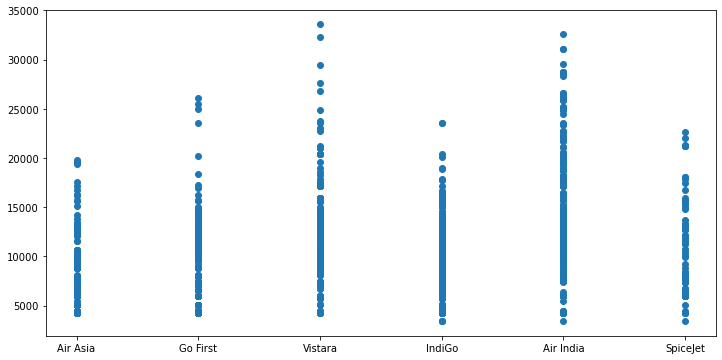

In [127]:
plt.figure(figsize=(12,6))
plt.scatter(df["Airline"],df["Price"])

Here we can see clearly that vistara charged high amount and comparitivly lowest charged by air asia

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

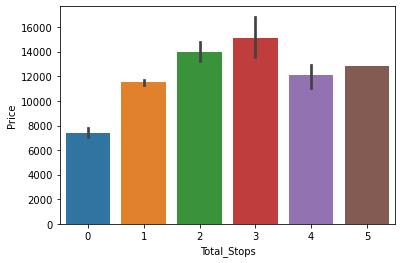

In [128]:
sns.barplot(x="Total_Stops",y="Price",data=df)

here we can see that price charging is deppend on number of stop. when non stop airline charged low amount and 3 stops charged high amount of price.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

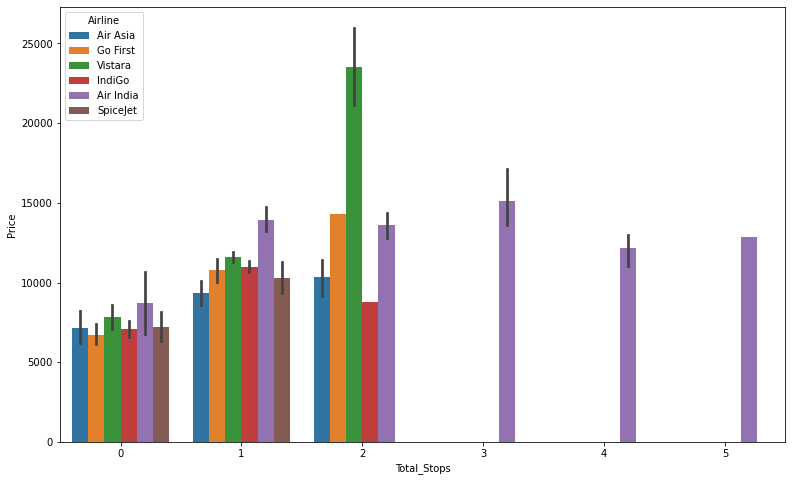

In [129]:
plt.figure(figsize=(13,8))
sns.barplot(x="Total_Stops",y="Price",data=df,hue="Airline")

we have five classification according to stop and only Air India provide all the services and they charged low to medium amount for ticket but 
vistara provide tree services and increase the price scale according to increase the number stop.

<AxesSubplot:xlabel='Source', ylabel='Price'>

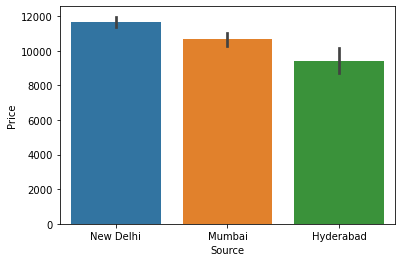

In [130]:
sns.barplot(df["Source"],df["Price"])

source also affect the price of airline. if the starting point is new delhi it will charged more price and hyderabad charged average

<AxesSubplot:xlabel='Source', ylabel='Price'>

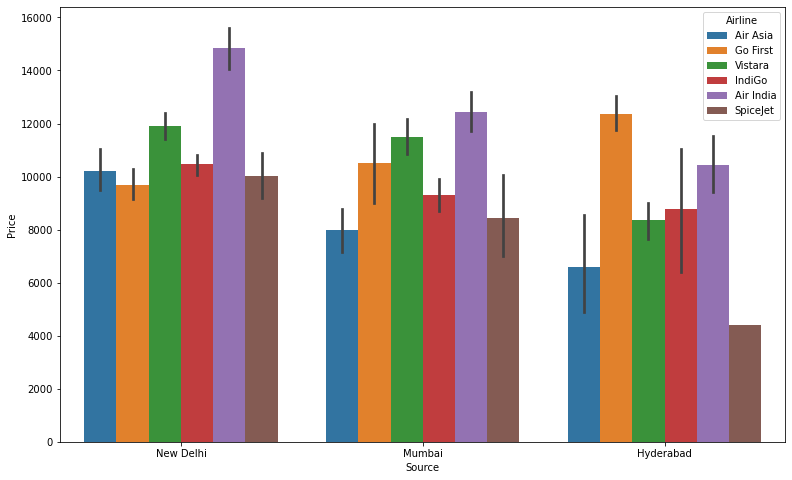

In [131]:
plt.figure(figsize=(13,8))
sns.barplot(x="Source",y="Price",data=df,hue="Airline")

All the airlines are serviced from tree cities and air india charged highest price except Hyderabad.

In [132]:
df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Price                 int32
Dep_Time_Hour         int64
Dep_Time_Min          int64
Arrival_Date          int64
Arrival_time_Hour     int64
Arrival_time_Min      int64
Travel_hours          int64
Travel_Min            int64
dtype: object

In [133]:
categorical = ["Airline","Source","Destination"]
numerical = ["Total_Stops","Price","Dep_Time_Hour","Dep_Time_Min","Arrival_Date","Arrival_time_Hour","Arrival_time_Min",
            "Travel_hours","Travel_Min"]

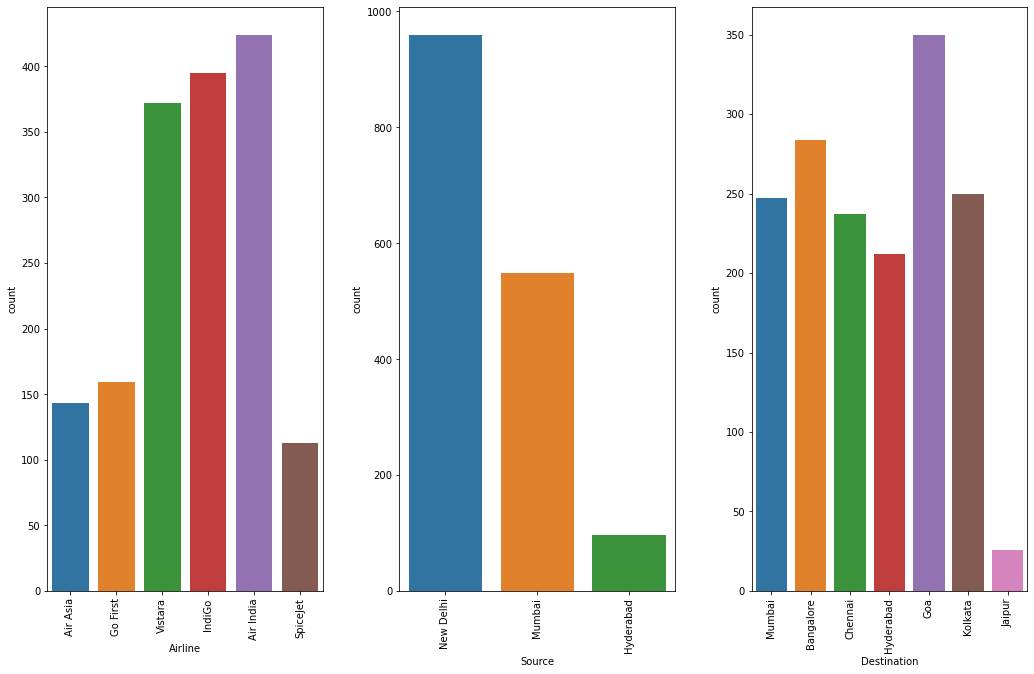

In [134]:
c = 1
plt.figure(figsize=(15,10))

for i in categorical:
    plt.subplot(1,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c = c+1
    
plt.show()    

Airline:
    
    1.Air india is the most prefered airline and followed by IndiGo and vistara.
    
    2. very less prefered choice is spicejet
    
Source:
    
    1. most of the flight take off from New delhi and hyderbad has the minimum count of flight take-offs.
    
Destination:
    
    1.Majority of flight landed to goa.
    
    2. Very less amount of flight are landed in jaipur
    
    

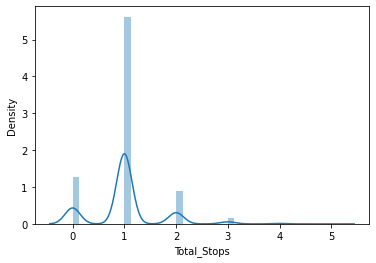

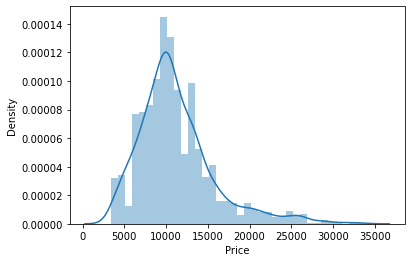

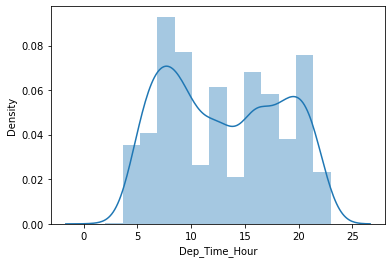

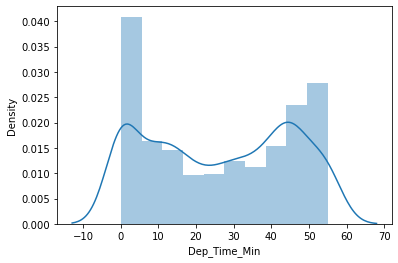

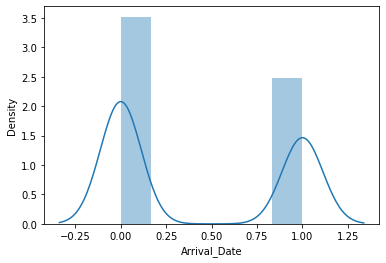

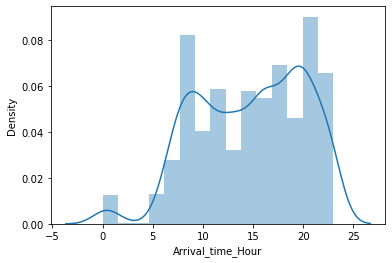

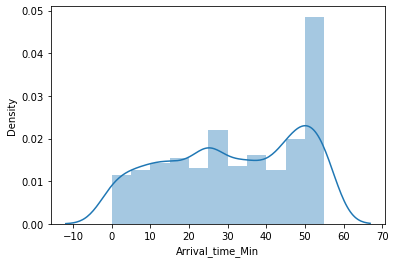

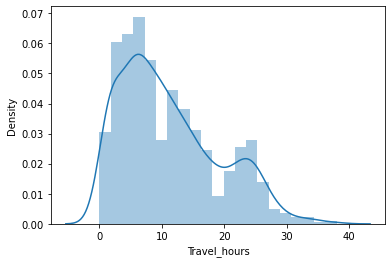

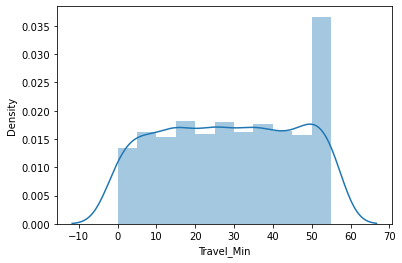

<Figure size 432x288 with 0 Axes>

In [135]:
for i in numerical:
    sns.distplot(df[i])
    plt.figure()  

Total stops:
    
    1 . majority of flight has 1 stop services so that it cann't be see as equal distribution.
    
Price:
    
    1. It is comparitivly equaly distributed.
    
Dep_Time_Hour:
    
    1.Majority of the flights tend to fly in the early morning time
     
    2. Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less in number.
            
Dep_time_min:
    
    1. Most flights take off at whole hours 
    
Arrival_date:
    
    1. Majority of flight reach their destimation with in the day.
    
Arrival_time_hour:
    
    1. Majority of the flights reach its destination in the evening time.
    
Travel_hour:
    
    1. Majority of flight take hour is 2 to 3 hr
        

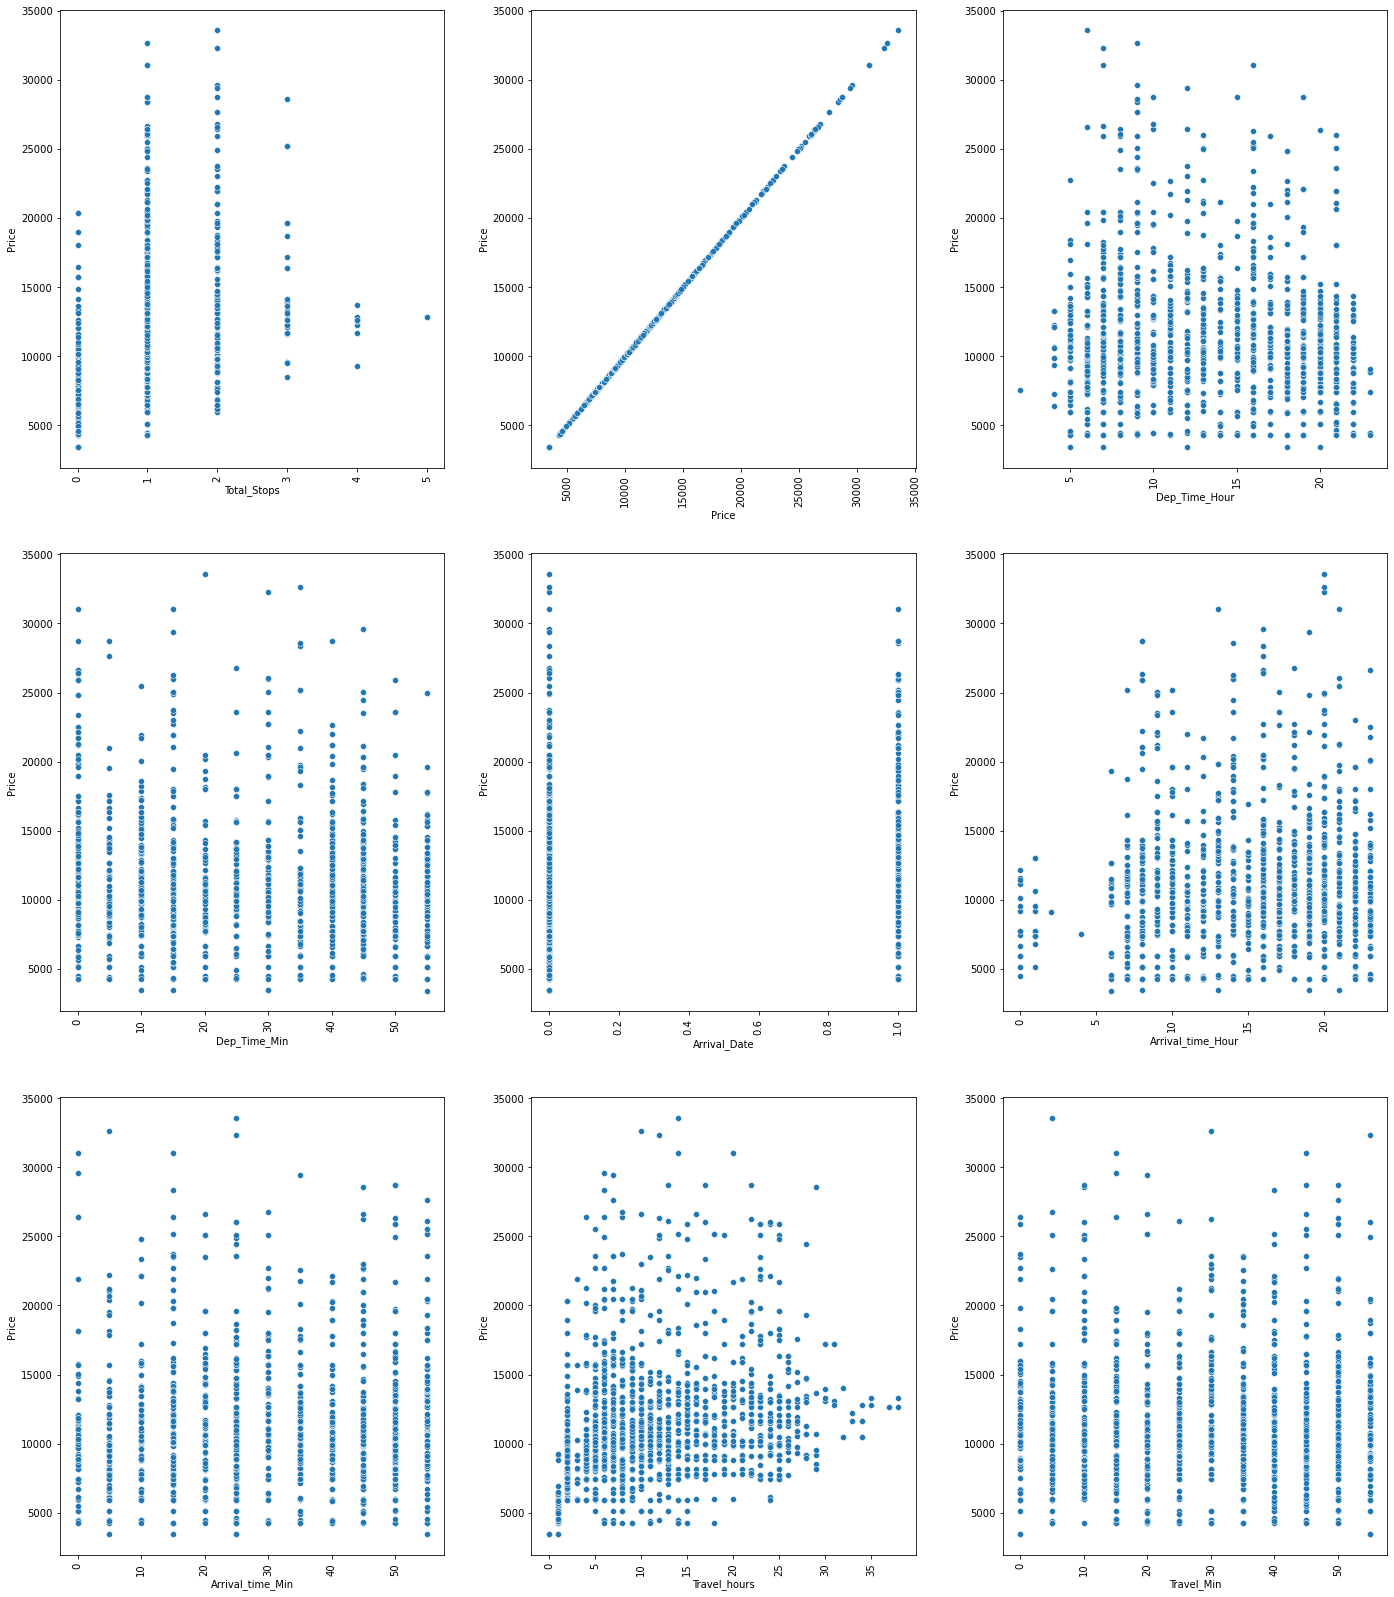

In [136]:
c=1
plt.figure(figsize=(20,45))

for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = df[i], y = df.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c = c+1
plt.show()    

In [137]:
df.skew()

Total_Stops          1.131885
Price                1.389143
Dep_Time_Hour        0.103351
Dep_Time_Min        -0.015546
Arrival_Date         0.351837
Arrival_time_Hour   -0.336065
Arrival_time_Min    -0.194612
Travel_hours         0.725388
Travel_Min          -0.031457
dtype: float64

Here we can see that two column has skewness but price is our target variable need not to handle so lets remove skewness from Total_stops column

In [138]:
df.Total_Stops = np.sqrt(df.Total_Stops)

In [140]:
df.Total_Stops.skew()

-1.0377653697971543

In [141]:
label = LabelEncoder()
for col in categorical:
    df[col] = label.fit_transform(df[col])

In [142]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_time_Hour,Arrival_time_Min,Travel_hours,Travel_Min
0,0,2,6,1.0,5953,9,25,0,16,0,6,35
1,0,2,6,1.0,5953,12,40,0,20,15,7,35
2,0,2,6,1.0,5953,11,55,0,20,15,8,20
3,0,2,6,1.0,5953,18,35,1,6,20,11,45
4,0,2,6,1.0,5953,16,15,1,6,20,14,5


In [143]:
x = df.drop('Price',axis = 1)

y = df['Price']

In [144]:
scale = StandardScaler()

x = scale.fit_transform(x)

In [145]:
max_r_score=0
for r_state in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  40  is:  0.2026886880747456
r2_score corresponding to random state:  41  is:  0.20384605923058052
r2_score corresponding to random state:  42  is:  0.18265799152011142
r2_score corresponding to random state:  43  is:  0.20513800749668476
r2_score corresponding to random state:  44  is:  0.2117408488762097
r2_score corresponding to random state:  45  is:  0.1955472134467241
r2_score corresponding to random state:  46  is:  0.14082314744810498
r2_score corresponding to random state:  47  is:  0.11724224988241028
r2_score corresponding to random state:  48  is:  0.1457050282459964
r2_score corresponding to random state:  49  is:  0.13680561996991014
r2_score corresponding to random state:  50  is:  0.2550111775717122
r2_score corresponding to random state:  51  is:  0.21100031598936253
r2_score corresponding to random state:  52  is:  0.19921674390473665
r2_score corresponding to random state:  53  is:  0.19051002664994376
r2_score corresponding to

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 66,test_size=0.20)

In [147]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    r2 = r2_score(y_test,pred)
    print("r2 score is:",r2)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))

In [148]:
eval(KNeighborsRegressor())

r2 score is: 0.3975903889093588
RMSE: 3427.9869583269456


r2 score of kneighbors is 39 so it is need improove accuracy 

In [149]:
kn = KNeighborsRegressor()

params = {'n_neighbors':np.arange(0,8),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','brute']}
cv = KFold ( n_splits = 5,shuffle = False ,random_state = None)

gcv = GridSearchCV(kn,params,cv=cv)


In [150]:
gcv .fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute'],
                         'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7]),
                         'weights': ['uniform', 'distance']})

In [151]:
gcv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}

In [152]:
kn_new=KNeighborsRegressor(algorithm ='ball_tree',n_neighbors = 7, weights = 'distance')
kn_new.fit(x_train,y_train)
pred=kn_new.predict(x_test)
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.5182876536470191
3065.399651244916


After giving some penalty its performance is increase to 51.

In [153]:
eval(DecisionTreeRegressor())

r2 score is: 0.17103020193186846
RMSE: 4021.2638433533048


Decisiontree perform very badly lets try to improve it.

In [154]:
tre=DecisionTreeRegressor()

params= {'criterion':['mse','mae','poisson'],
        'splitter':['best','random'],
        'max_depth':np.arange(1,10)}

cv=KFold(n_splits=5,shuffle=False, random_state=None)
gcv = GridSearchCV (tre , params , cv=cv)

In [155]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [156]:
gcv.best_params_

{'criterion': 'mse', 'max_depth': 8, 'splitter': 'random'}

In [157]:
tre_new=DecisionTreeRegressor( criterion = 'mse', max_depth= 8 ,splitter='random')
tre_new.fit(x_train,y_train)
pred=tre_new.predict(x_test)
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.4237996333292774
3352.5864087580976


now it is in 42

In [158]:
eval(RandomForestRegressor())

r2 score is: 0.5969047097505872
RMSE: 2804.123111488438


accuracy of randomforest is 59

In [159]:
forest=RandomForestRegressor()

params= {'criterion':["squared_error", "mse", "absolute_error", "poisson"],
        'max_features':["auto", "sqrt","log2"],
        'n_estimators':np.arange(1,10)}

cv=KFold(n_splits=5,shuffle=False, random_state=None)
gcv = GridSearchCV (forest , params , cv=cv)

In [160]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [161]:
gcv.best_params_

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 9}

In [162]:
forst=RandomForestRegressor( criterion = 'mse', max_features='log2',n_estimators=9)
forst.fit(x_train,y_train)
pred=forst.predict(x_test)
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.5375189363125722
3003.58683790858


final accuracy of randomforest is 53

conclusion:
    
    RandomForest is the best model. The price of flight deppends on take off point, number of stops and hours taken for travelling.
    High amount of price charged by vistara airlines. High number of service provided by Airindia with average price scale.